# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv('licfile.csv')
df.head()

/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df = pd.read_csv('licfile.csv', header = None)

In [4]:
keys = list(df.columns)
values = '''LICTYPE
LICNUMBER
BIZCOUNTY
BIZNAME
BIZLINE1
BIZLINE2
BIZCITYSTATE
BIZTELEPHONE
EXPIRATION
OWNER
MAILLINE1
MAILLINE2
MAILCITYSTATE
MAILCOUNTYCODE
MAILCOUNTY
MAILZIP
TELEPHONE
LICSUBTYPE
CEFLAG'''.split()
col_dict = dict(zip(keys, values))

In [5]:
df = df.rename(columns = (col_dict))
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [6]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION          int64
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE    float64
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

In [7]:
df = pd.read_csv('licfile.csv', header = None, dtype = {8: str, 13: str, 15: str})
df = df.rename(columns = (col_dict))
df.head()

/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [8]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [9]:
df['EXPIRATION'] = df.EXPIRATION.str[-4:] + '-' + df.EXPIRATION.str[:2] + '-' + df.EXPIRATION.str[2:4]

Check the first five expirations to make sure they look right.

In [10]:
df.EXPIRATION.head()

0    2017-08-10
1    2017-12-29
2    2017-09-26
3    2017-11-04
4    2018-02-25
Name: EXPIRATION, dtype: object

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [11]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [12]:
df.LICTYPE.value_counts().sort_values(ascending = True).head(10)

#OR
#df.LICTYPE.value_counts().tail(10)

Legal Service Contract Admin                       1
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Licensed Court Interpreter CE Provider             2
Mobile Cosmetology Manicure Specialty Saloon       2
Booting CE Provider                                3
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Mobile Cosmetology Esthetician Specialty Saloon    5
Elevator Responsible Party CE Provider             8
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [13]:
# Yes I know I left this in here, it's a learning experience!
# df[df['LICTYPE'].str.contains("Electrician")]


## 8. How many of the rows of LICTYPE are NaN?

In [14]:
df.LICTYPE.isna().sum()

7086

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [15]:
df[df.LICTYPE.str.contains('Electrician', na = False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,2016-10-21,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,0201,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,2017-12-14,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,0453,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017-06-03,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,0067,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017-06-11,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,0201,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,2017-11-17,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,0167,GALVESTON,77568,4095390843,AE,N


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

## 10. What's the most popular kind of electrician?

In [16]:
df[df.LICTYPE.str.contains('Electrician', na = False)].LICTYPE.value_counts()

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

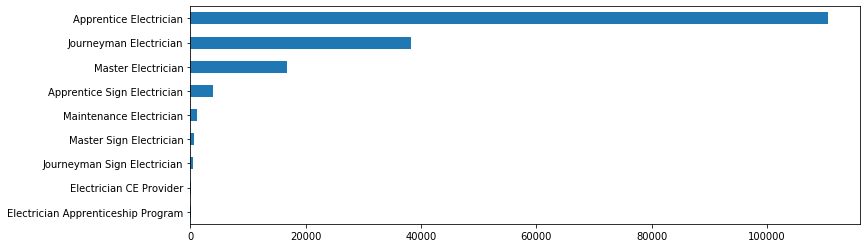

In [17]:
df[df.LICTYPE.str.contains('Electrician', na = False)].LICTYPE.value_counts().sort_values().plot(kind = 'barh', figsize = (12,4))

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [18]:
df[df.LICTYPE.str.contains('Sign Electrician', na = False)].LICTYPE.count()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [19]:
df.OWNER.str.extract('^(.*),', expand = False)

0            RISINGER
1            WILLIAMS
2             GUEVARA
3              BOWERS
4              DEMSKY
5            THOMPSON
6              TUCKER
7              COOPER
8         BLANKENSHIP
9               DAWES
10             LESTER
11            MANCILL
12         HUDDLESTON
13             JORDAN
14              IRWIN
15               HALL
16              JAMES
17             SIDAWI
18              SMITH
19           FERGUSON
20           MCKINLEY
21             SOWELL
22             SEVIER
23         SOMERVILLE
24           BARCLIFT
25               FORD
26            SCHAFER
27           MARTINEZ
28            CLEMANS
29           MARTINEZ
             ...     
597786        SNUFFER
597787       MARTINEZ
597788         YOSTEN
597789          CLICK
597790          PENSE
597791           LARA
597792          SMITH
597793      BINNICKER
597794         CHAVEZ
597795       GUERRERO
597796         SAVAGE
597797          ADAMS
597798          SCOTT
597799           HILL
597800    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [20]:
df['OWNER_LASTNAME'] = df.OWNER.str.extract('^(.*),', expand = False)

In [21]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [22]:
df.OWNER_LASTNAME.value_counts().head(10)

NGUYEN       22283
TRAN          8135
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: OWNER_LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [23]:
df[df.OWNER_LASTNAME == 'NGUYEN'].LICTYPE.value_counts()

Cosmetology Manicurist                      12855
Cosmetology Operator                         4039
Cosmetology Esthetician                      2881
Cosmetologist                                1874
Apprentice Electrician                        195
A/C Technician                                169
Journeyman Electrician                         55
Cosmetology Operator Instructor                48
Barber Manicurist                              25
Master Electrician                             25
Barber, Class A                                22
Property Tax Appraiser                         15
Apprentice Sign Electrician                    14
Cosmetology Manicurist Instructor               8
Legal Service Contract Sales Rep                8
Maintenance Electrician                         6
Used Auto Parts Recycler Employee               6
Tow Truck Operator (Incident Management)        4
Master Sign Electrician                         4
Property Tax Consultant                         3


In [24]:
df[df.OWNER_LASTNAME == 'TRAN'].LICTYPE.value_counts()

Cosmetology Manicurist                      4674
Cosmetology Operator                        1474
Cosmetology Esthetician                     1032
Cosmetologist                                712
Apprentice Electrician                        95
A/C Technician                                69
Journeyman Electrician                        16
Cosmetology Operator Instructor               10
Barber Manicurist                              9
Barber, Class A                                7
Master Electrician                             5
Property Tax Appraiser                         4
Apprentice Sign Electrician                    4
Tow Truck Operator (Incident Management)       2
Legal Service Contract Sales Rep               2
Cosmetology Manicurist Instructor              2
Booting Operator                               2
Used Auto Parts Recycler Employee              2
Maintenance Electrician                        1
Tow Truck Operator (Consent Tow)               1
VSF Employee        

In [25]:
df[df.OWNER_LASTNAME == 'LE'].LICTYPE.value_counts()

Cosmetology Manicurist                      3276
Cosmetology Operator                         953
Cosmetology Esthetician                      730
Cosmetologist                                497
A/C Technician                                43
Apprentice Electrician                        37
Journeyman Electrician                        20
Cosmetology Operator Instructor               12
Barber, Class A                                7
Master Electrician                             6
Tow Truck Operator (Consent Tow)               4
Barber Manicurist                              3
Apprentice Sign Electrician                    2
Cosmetology Manicurist Instructor              2
Property Tax Appraiser                         2
Used Auto Parts Recycler Employee              2
Property Tax Consultant                        1
Tow Truck Operator (Incident Management)       1
Master Sign Electrician                        1
Maintenance Electrician                        1
Journeyman Sign Elec

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [26]:
df[df.OWNER_LASTNAME.str.contains('LE|NGUYEN|TRAN', na = False)].LICTYPE.value_counts()

Cosmetology Manicurist                      21696
Cosmetology Operator                        18574
Apprentice Electrician                       9654
Cosmetology Esthetician                      5872
Journeyman Electrician                       3282
Cosmetologist                                3196
A/C Technician                               2519
Master Electrician                           1525
Barber, Class A                              1384
Legal Service Contract Sales Rep              996
Tow Truck Operator (Incident Management)      669
Electrical Contractor                         597
Cosmetology Operator Instructor               560
Tow Truck Operator (Consent Tow)              469
Dual Towing Operator(IM)/VSF Employee         361
Apprentice Sign Electrician                   335
Property Tax Appraiser                        293
VSF Employee                                  283
Auctioneer                                    248
Used Auto Parts Recycler Employee             226


## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [27]:
df[df.OWNER_LASTNAME == 'GARCIA'].LICTYPE.value_counts()

Apprentice Electrician                          1952
Cosmetology Operator                            1672
Journeyman Electrician                           493
A/C Technician                                   333
Barber, Class A                                  186
Master Electrician                               118
Tow Truck Operator (Incident Management)          94
Cosmetology Esthetician                           88
Apprentice Sign Electrician                       87
Tow Truck Operator (Consent Tow)                  78
Cosmetology Manicurist                            75
Cosmetology Operator Instructor                   48
Legal Service Contract Sales Rep                  37
Dual Towing Operator(IM)/VSF Employee             36
VSF Employee                                      36
Used Auto Parts Recycler Employee                 32
Residential Wireman                               27
Property Tax Appraiser                            26
Journeyman Sign Electrician                   

In [28]:
df[df.OWNER_LASTNAME == 'RODRIGUEZ'].LICTYPE.value_counts()

Apprentice Electrician                          1573
Cosmetology Operator                            1390
Journeyman Electrician                           386
A/C Technician                                   320
Barber, Class A                                  138
Cosmetology Esthetician                           91
Master Electrician                                83
Tow Truck Operator (Incident Management)          80
Tow Truck Operator (Consent Tow)                  69
Cosmetology Manicurist                            60
Apprentice Sign Electrician                       57
Cosmetology Operator Instructor                   44
Used Auto Parts Recycler Employee                 39
Legal Service Contract Sales Rep                  37
Dual Towing Operator(IM)/VSF Employee             32
VSF Employee                                      20
Residential Wireman                               17
Property Tax Appraiser                            17
Maintenance Electrician                       

In [29]:
df[df.OWNER_LASTNAME == 'MARTINEZ'].LICTYPE.value_counts()

Apprentice Electrician                          1618
Cosmetology Operator                            1388
Journeyman Electrician                           387
A/C Technician                                   317
Barber, Class A                                  149
Master Electrician                                92
Cosmetology Esthetician                           86
Tow Truck Operator (Incident Management)          70
Cosmetology Manicurist                            63
Used Auto Parts Recycler Employee                 62
Tow Truck Operator (Consent Tow)                  62
Apprentice Sign Electrician                       55
Legal Service Contract Sales Rep                  52
Cosmetology Operator Instructor                   43
VSF Employee                                      36
Dual Towing Operator(IM)/VSF Employee             25
Residential Wireman                               24
Property Tax Appraiser                            13
Maintenance Electrician                       

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [30]:
df[df.OWNER_LASTNAME.str.contains('EZ$', na = False)].LICTYPE.value_counts()

Apprentice Electrician                          16065
Cosmetology Operator                            13885
Journeyman Electrician                           3529
A/C Technician                                   2889
Barber, Class A                                  1277
Master Electrician                                763
Cosmetology Esthetician                           748
Tow Truck Operator (Consent Tow)                  695
Cosmetology Manicurist                            633
Tow Truck Operator (Incident Management)          620
Apprentice Sign Electrician                       602
Legal Service Contract Sales Rep                  415
Cosmetology Operator Instructor                   400
Used Auto Parts Recycler Employee                 389
VSF Employee                                      263
Residential Wireman                               251
Dual Towing Operator(IM)/VSF Employee             238
Property Tax Appraiser                            135
Maintenance Electrician     

## 20. Get that as a percentage

In [31]:
df[df.OWNER_LASTNAME.str.contains('EZ$', na = False)].LICTYPE.value_counts(normalize = True)

Apprentice Electrician                          0.361816
Cosmetology Operator                            0.312718
Journeyman Electrician                          0.079480
A/C Technician                                  0.065066
Barber, Class A                                 0.028761
Master Electrician                              0.017184
Cosmetology Esthetician                         0.016846
Tow Truck Operator (Consent Tow)                0.015653
Cosmetology Manicurist                          0.014256
Tow Truck Operator (Incident Management)        0.013964
Apprentice Sign Electrician                     0.013558
Legal Service Contract Sales Rep                0.009347
Cosmetology Operator Instructor                 0.009009
Used Auto Parts Recycler Employee               0.008761
VSF Employee                                    0.005923
Residential Wireman                             0.005653
Dual Towing Operator(IM)/VSF Employee           0.005360
Property Tax Appraiser         

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [32]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [33]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [34]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [35]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [36]:
df.OWNER.str.extract(', (\S*) ').head(10)

,0
0,JIM
1,JON
2,JUAN
3,JAMES
4,JOHN
5,RANDY
6,MONTE
7,THOMAS
8,KERRY
9,NICHOLAS


## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [37]:
df['FIRSTNAME'] = df.OWNER.str.extract(', (\S*)', expand = False)
df.FIRSTNAME

0               JIM
1               JON
2              JUAN
3             JAMES
4              JOHN
5             RANDY
6             MONTE
7            THOMAS
8             KERRY
9          NICHOLAS
10            TIMMY
11             MARK
12            SHAWN
13            JAMES
14          MICHAEL
15           WESLEY
16           BACHUS
17           JOSEPH
18            DAVID
19           JACKIE
20          MATTHEW
21            KALEN
22         VIRGINIA
23              CAL
24           AUSTIN
25         PATRICIA
26          TIMOTHY
27           BRANDY
28          ZACHARY
29           ARTURO
            ...    
597786      KENNETH
597787         JUAN
597788        BLAKE
597789          JAY
597790        LARRY
597791       STEVEN
597792         JACE
597793      RICHARD
597794    FRANCISCO
597795          REY
597796     CROCKETT
597797        AARON
597798        JAMES
597799         RYAN
597800        JARED
597801       WESLEY
597802       JOSHUA
597803        AARON
597804        BRUCE


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [38]:
df.FIRSTNAME.isnull().sum()

82099

What do their names look like?

In [39]:
df[df.FIRSTNAME.isnull()].OWNER

1501                                  PERRY,MARK E
5826                       MEJIA ,LUIS GILBERTO JR
28022      APPLIANCE INSTALLATION BY SPECIAL D LLC
28023                     CAPITAL DISTRIBUTING INC
28024                                INSTALLCO LLC
28025                 LAFFERTYS TV & APPLIANCE INC
28026                              BALLARD COMPANY
28027                   FACTORY BUILDER STORES LTD
28028                            HARWAY SUPPLY INC
28030                             RODENBAUGH'S INC
28031                            RWB INSTALLATIONS
28032               D V S - DRYER VENTING SERVICES
28033               COLUMBUS TELEVISION CENTER INC
28034                          KIMMEN INSTALLATION
28035                         SEARS ROEBUCK AND CO
28036             INTRASTATE SALES ENTERPRISES INC
28037                 MR HANDYMAN OF THE WOODLANDS
28038     DOSHIER APPL INC DBA DOSHIER APPL REPAIR
28039                           KELM HOME SERVICES
28040                TOM'S APPL

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [40]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df[df.FIRSTNAME.isna()].OWNER.str.extract(',(\S*) ', expand = False)

How many empty first names do we have now?

In [41]:
df.FIRSTNAME.isnull().sum()

81798

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [42]:
df.FIRSTNAME.value_counts().head(30)

JOSE           7754
MICHAEL        5882
DAVID          5378
MARIA          5280
JAMES          4945
JUAN           4564
ROBERT         4389
JOHN           4345
CHRISTOPHER    3138
DANIEL         3042
WILLIAM        2902
RICHARD        2549
LUIS           2338
JESUS          2137
JENNIFER       2120
THUY           2098
CARLOS         2079
CHARLES        2072
PHUONG         1984
JOSEPH         1967
JASON          1878
MARK           1849
JESSICA        1804
KIM            1760
JOSHUA         1753
THOMAS         1747
JORGE          1682
MARY           1666
KEVIN          1647
STEVEN         1627
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [43]:
df[df.LICTYPE.str.contains('Cosmetology|Cosmetologist', na = False)].FIRSTNAME.value_counts().head(30)

MARIA        4771
THUY         2087
PHUONG       1970
JENNIFER     1902
KIM          1682
JESSICA      1633
THANH        1417
MARY         1385
ASHLEY       1359
THU          1230
NGOC         1204
AMANDA       1187
ELIZABETH    1184
ANH          1178
KIMBERLY     1147
TRANG        1135
LINDA        1104
MICHELLE     1080
THAO         1044
STEPHANIE    1030
PATRICIA     1023
SANDRA       1023
LISA         1021
LAURA        1009
HONG          975
MELISSA       950
DUNG          944
VAN           940
HUONG         898
LINH          893
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [44]:
df[df.LICTYPE.str.contains('Electrician', na = False)].FIRSTNAME.value_counts().head(30)

JOSE           5716
MICHAEL        3546
JUAN           3333
DAVID          3314
JAMES          2971
ROBERT         2528
JOHN           2528
DANIEL         2007
CHRISTOPHER    1972
WILLIAM        1744
LUIS           1739
JESUS          1647
RICHARD        1506
CARLOS         1476
JORGE          1280
CHARLES        1222
JOSEPH         1196
JOSHUA         1183
JASON          1174
MIGUEL         1109
MARK           1085
FRANCISCO      1073
MATTHEW         995
THOMAS          994
JUSTIN          957
STEVEN          936
VICTOR          906
KEVIN           898
JONATHAN        887
OSCAR           879
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [45]:
!pip install gender-guesser

#### Test to see that it works

In [46]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [47]:
detector.get_gender('Jose')

'male'

In [48]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [49]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    male
1    male
2    male
3    male
4    male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [50]:
df['GENDER'] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

In [51]:
df.GENDER.value_counts()

male             228984
female           148122
unknown          132216
mostly_female     41423
mostly_male       26488
andy              20583
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [52]:
import numpy as np

df['GENDER'] = df.GENDER.replace({
    'mostly_female': 'female',
    'mostly_male': 'male',
    'andy': np.nan,
    'unknown': np.nan
})


## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [53]:
df.GENDER.value_counts()

male      255472
female    189545
Name: GENDER, dtype: int64

In [54]:
df.GENDER.isnull().value_counts(normalize = True)

False    0.744405
True     0.255595
Name: GENDER, dtype: float64

In [55]:
# OR
df.GENDER.value_counts(normalize = True, dropna = False)

male      0.427342
female    0.317062
NaN       0.255595
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [56]:
df[df.GENDER.isna()].FIRSTNAME.value_counts()

THANH        1466
TRANG        1139
HONG          989
DUNG          984
LINH          901
LAN           798
INC           726
LLC           635
YEN           618
HANG          586
HUNG          487
CHAU          477
TUYEN         399
CHI           398
HAI           389
XUAN          386
CASEY         342
BINH          320
QUYEN         306
DIEM          304
HUE           295
INC.          286
AN            275
SANTOS        266
JACKIE        245
TRAN          245
VY            244
LY            234
NGUYEN        234
LA            228
             ... 
JAGO            1
LETHADAWN       1
JEDRICK         1
HOANGANH        1
STOUT           1
JERMANI         1
ANDR            1
KATTYA          1
NERLIN          1
ELARSE          1
ARRIANNA        1
CHENIKQUA       1
BEDER           1
NASHAUNDA       1
METERE          1
ALEXZYK         1
ZA'VONYA        1
LYLIANA         1
EBONEKE         1
THIENHA         1
CONSTON         1
MELVENA         1
UNTWAUN         1
CITHLALY        1
MAREENYN  

## 31. What are the most popular licenses for men? For women?

In [57]:
df[df.GENDER == 'male'].LICTYPE.value_counts()

Apprentice Electrician                          95603
Journeyman Electrician                          35505
A/C Technician                                  24696
Master Electrician                              15770
Cosmetology Operator                            13541
Cosmetology Manicurist                          10643
Barber, Class A                                  9770
Tow Truck Operator (Incident Management)         6851
Tow Truck Operator (Consent Tow)                 5779
Legal Service Contract Sales Rep                 5662
Dual Towing Operator(IM)/VSF Employee            3662
Apprentice Sign Electrician                      3366
Auctioneer                                       1921
Used Auto Parts Recycler Employee                1874
Appliance Installer                              1818
Water Well Driller/Pump Installer                1612
Cosmetology Esthetician                          1575
Residential Wireman                              1466
Property Tax Appraiser      

In [58]:
df[df.GENDER == 'female'].LICTYPE.value_counts()

Cosmetology Operator                            114581
Cosmetology Manicurist                           24328
Cosmetology Esthetician                          16990
Apprentice Electrician                            4785
Cosmetologist                                     4497
Legal Service Contract Sales Rep                  4434
Cosmetology Operator Instructor                   4393
Barber, Class A                                   4097
VSF Employee                                      1757
Property Tax Appraiser                            1176
Journeyman Electrician                            1025
A/C Technician                                     877
Cosmetology Hair Braider                           565
Used Auto Parts Recycler Employee                  434
Property Tax Consultant                            428
Property Tax Assessor/Collector                    407
Master Electrician                                 393
Tow Truck Operator (Incident Management)           343
Auctioneer

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [59]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts(normalize = True)

male      0.553361
female    0.446639
Name: GENDER, dtype: float64

In [60]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].GENDER.value_counts(normalize = True)

male      0.95301
female    0.04699
Name: GENDER, dtype: float64

(By the way, what are those tow truck jobs?)

In [61]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].LICTYPE.unique()

array(['Tow Truck Operator (Consent Tow)',
       'Tow Truck Operator (Incident Management)',
       'Tow Truck Operator (Private Property)',
       'Tow Truck Operator Trainee'], dtype=object)

## 33. Graph them!

And let's **give them titles** so we know which is which.

In [62]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].LICTYPE.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

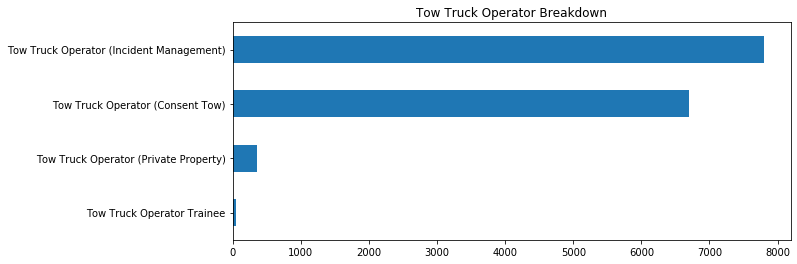

In [63]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].LICTYPE.value_counts().sort_values().plot(kind = 'barh', figsize = (10,4), title = 'Tow Truck Operator Breakdown')

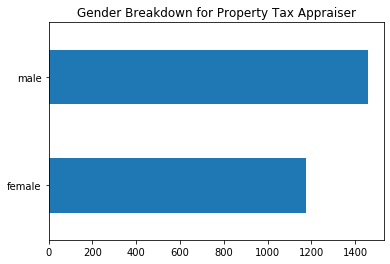

In [64]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts().sort_values().plot(kind = 'barh', title = 'Gender Breakdown for Property Tax Appraiser')

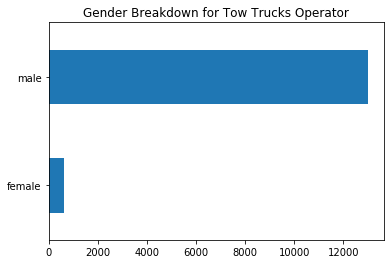

In [65]:
df[df.LICTYPE.str.contains('Tow Truck').fillna(False)].GENDER.value_counts().sort_values().plot(kind = 'barh', title = 'Gender Breakdown for Tow Trucks Operator')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [66]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95603
Journeyman Electrician    35505
A/C Technician            24696
Master Electrician        15770
Cosmetology Operator      13541
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [67]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C CE Provider,NaN,NaN,56.0
A/C Contractor,3.0,NaN,16373.0
A/C Technician,24696.0,877.0,2386.0
Appliance Installation Contractor,NaN,NaN,668.0
Appliance Installer,1818.0,66.0,76.0


In [68]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C CE Provider,NaN,NaN,56.0
1,A/C Contractor,3.0,NaN,16373.0
2,A/C Technician,24696.0,877.0,2386.0
3,Appliance Installation Contractor,NaN,NaN,668.0
4,Appliance Installer,1818.0,66.0,76.0


In [69]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C CE Provider,0.0,0.0,56.0
1,A/C Contractor,3.0,0.0,16373.0
2,A/C Technician,24696.0,877.0,2386.0
3,Appliance Installation Contractor,0.0,0.0,668.0
4,Appliance Installer,1818.0,66.0,76.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [130]:
# df.LICTYPE.value_counts()
# a = df.LICTYPE.value_counts(dropna = False)
# b = df.LICTYPE.value_counts(dropna = True)

# c = pd.DataFrame(a).merge(pd.DataFrame(b), left_index=True, right_index=True)
# sum(c.LICTYPE_x / c.LICTYPE_y != 1)


A/C CE Provider                                              NaN
A/C Contractor                                          0.000183
A/C Technician                                          0.914661
Appliance Installation Contractor                            NaN
Appliance Installer                                     0.961224
Apprentice Electrician                                  0.907725
Apprentice Sign Electrician                             0.886329
Associate Auctioneer                                    0.951613
Auctioneer                                              0.938235
Auctioneer CE Provider                                       NaN
Barber Hair Braiding Shop                                    NaN
Barber Hair Braiding Specialist                         0.568966
Barber Hair Weaving Shop                                     NaN
Barber Hair Weaving Specialist                          0.454545
Barber Instructor                                       0.800983
Barber Manicurist        

In [131]:
df[df.GENDER.notna()].groupby('LICTYPE').GENDER.value_counts(normalize = True)
df[df.GENDER.notna()].LICTYPE.value_counts()

male_percent = df[df.GENDER == 'male'].LICTYPE.value_counts()/df[df.GENDER.notna()].LICTYPE.value_counts()
female_percent = df[df.GENDER == 'female'].LICTYPE.value_counts()/df[df.GENDER.notna()].LICTYPE.value_counts()
known_percent = df[df['GENDER'].notnull()].LICTYPE.value_counts() / df.LICTYPE.value_counts()

gender_series = [
    known_percent,
    male_percent,
    female_percent,    
]

gender_df_2 = pd.concat(gender_series, axis = 1)

gender_df_2.reset_index(inplace = True)

gender_df_2.columns = ['type', 'known_percent', 'male_percent', 'female_percent']

gender_df_merged = gender_df.merge(gender_df_2, left_on = 'license', right_on = 'type')

gender_df_merged = gender_df_merged.fillna(0)
gender_df_merged = gender_df_merged.drop(columns = 'type')
gender_df_merged

/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,license,male,female,unknown,known_percent,male_percent,female_percent
0,A/C CE Provider,0.0,0.0,56.0,0.000000,0.000000,0.000000
1,A/C Contractor,3.0,0.0,16373.0,0.000183,1.000000,0.000000
2,A/C Technician,24696.0,877.0,2386.0,0.914661,0.965706,0.034294
3,Appliance Installation Contractor,0.0,0.0,668.0,0.000000,0.000000,0.000000
4,Appliance Installer,1818.0,66.0,76.0,0.961224,0.964968,0.035032
5,Apprentice Electrician,95603.0,4785.0,10205.0,0.907725,0.952335,0.047665
6,Apprentice Sign Electrician,3366.0,174.0,454.0,0.886329,0.950847,0.049153
7,Associate Auctioneer,51.0,8.0,3.0,0.951613,0.864407,0.135593
8,Auctioneer,1921.0,312.0,147.0,0.938235,0.860278,0.139722
9,Auctioneer CE Provider,0.0,0.0,19.0,0.000000,0.000000,0.000000


In [71]:
# NOT-WORKING CODE
# temp_df = temp.to_frame()
# temp_df = temp_df.rename(columns = {'GENDER':'gender','GENDER':'gender_percent'})
# temp_df = temp_df.reset_index()
# temp_df
# gender_temp = temp_df.pivot(index='LICTYPE', columns='GENDER', values='gender_percent').reset_index()

# # temp = pd.DataFrame(temp)


# temp = temp.rename(columns={'GENDER':'gender_percentage'})
# temp = temp.reset_index()
# temp.pivot(index='LICTYPE', columns='GENDER', values='gender_percentage').reset_index()

# male_percent = temp_df[temp_df.GENDER == 'male'].gender_percent
# female_percent = temp_df[temp_df.GENDER == 'female'].gender_percent

# temp_series = [
#     male_percent,
#     female_percent,
#     df[df.LICTYPE.notna()].LICTYPE.value_counts(normalize = True)
# ]


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [137]:
gender_df_merged[(gender_df_merged.male + gender_df_merged.female > 2000) & (gender_df_merged.known_percent > 0.75)].sort_values('male_percent', ascending = False).head(10)




,license,male,female,unknown,known_percent,male_percent,female_percent
68,Master Electrician,15770.0,393.0,647.0,0.961511,0.975685,0.024315
60,Journeyman Electrician,35505.0,1025.0,1640.0,0.957034,0.971941,0.028059
2,A/C Technician,24696.0,877.0,2386.0,0.914661,0.965706,0.034294
93,Tow Truck Operator (Consent Tow),5779.0,276.0,648.0,0.903327,0.954418,0.045582
5,Apprentice Electrician,95603.0,4785.0,10205.0,0.907725,0.952335,0.047665
94,Tow Truck Operator (Incident Management),6851.0,343.0,610.0,0.921835,0.952321,0.047679
6,Apprentice Sign Electrician,3366.0,174.0,454.0,0.886329,0.950847,0.049153
52,Dual Towing Operator(IM)/VSF Employee,3662.0,267.0,244.0,0.941529,0.932044,0.067956
8,Auctioneer,1921.0,312.0,147.0,0.938235,0.860278,0.139722
98,Used Auto Parts Recycler Employee,1874.0,434.0,201.0,0.919888,0.811958,0.188042


In [138]:
gender_df_merged[(gender_df_merged.male + gender_df_merged.female > 2000) & (gender_df_merged.known_percent > 0.75)].sort_values('female_percent', ascending = False).head(10)




,license,male,female,unknown,known_percent,male_percent,female_percent
30,Cosmetology Esthetician,1575.0,16990.0,5048.0,0.786219,0.084837,0.915163
41,Cosmetology Operator,13541.0,114581.0,23084.0,0.847334,0.105688,0.894312
42,Cosmetology Operator Instructor,552.0,4393.0,800.0,0.860748,0.111628,0.888372
99,VSF Employee,1434.0,1757.0,299.0,0.914327,0.449389,0.550611
79,Property Tax Appraiser,1457.0,1176.0,213.0,0.925158,0.553361,0.446639
64,Legal Service Contract Sales Rep,5662.0,4434.0,1340.0,0.882826,0.560816,0.439184
21,"Barber, Class A",9770.0,4097.0,2152.0,0.865660,0.704550,0.295450
98,Used Auto Parts Recycler Employee,1874.0,434.0,201.0,0.919888,0.811958,0.188042
8,Auctioneer,1921.0,312.0,147.0,0.938235,0.860278,0.139722
52,Dual Towing Operator(IM)/VSF Employee,3662.0,267.0,244.0,0.941529,0.932044,0.067956


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [164]:
less_male = gender_df_merged[(gender_df_merged.male_percent < 0.25) & (gender_df_merged.male_percent > 0)].license.tolist()

In [151]:
less_female = gender_df_merged[(gender_df_merged.female_percent < 0.25) & (gender_df_merged.female_percent > 0)].license.tolist()

In [170]:
df[(df.LICTYPE.str.contains('|'.join(less_male), na = False)) & (df.GENDER == 'male')].TELEPHONE

163978    4694327877
163986    8066810399
163998    6824729900
164003    8062962671
164023    8175604755
164064    3615104455
164091    9725521297
164096    3617796561
164113    8179839607
164118    6825971209
164120    3615850147
164124    8179963947
164125    9038099817
164128    3615483948
164154    8309473068
164157    3612293333
164159    8175263069
164164    5124703983
164185    3617651266
164186    6825510398
164192    8064185702
164203    8064012797
164205    6824724726
164206    8175017543
164216    8062419819
164226    3612054240
169059    2109977063
172592    8175049321
175263    4047340949
175485    4698266937
             ...    
431083    4152602865
431095    2818291740
431117    7867658980
431122    4357306688
431124    9546958118
431128    4694876630
431144    7085374660
431153    6825577304
431157    6157394740
431161    7605141579
431177    9189270189
431185    4086467375
431205    6825582110
431219    7134784624
431240           NaN
431241    9046513145
431262    816

In [171]:
df[(df.LICTYPE.str.contains('|'.join(less_female), na = False)) & (df.GENDER == 'female')].TELEPHONE


/Users/tbi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


8          5802765961
22         9726930572
25         2814797848
27         9153733887
38         9032624166
52         8306095014
55         8066833130
61         9032883443
109               NaN
114               NaN
117               NaN
140               NaN
167               NaN
175               NaN
186               NaN
244               NaN
317               NaN
345               NaN
357               NaN
402               NaN
412               NaN
451               NaN
454               NaN
477               NaN
513               NaN
556               NaN
561               NaN
614               NaN
649               NaN
657               NaN
             ...     
597102    9.79543e+09
597116    9.36757e+09
597118    7.13897e+09
597157    9.03681e+09
597173    8.06639e+09
597253    8.03438e+09
597262    9.03595e+09
597276    3.61728e+09
597286    8.06441e+09
597313    2.54387e+09
597326    9.03259e+09
597377    8.30775e+09
597383    5.80657e+09
597425    9.56718e+09
597455    

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [74]:
violations_df = pd.read_csv('violations.csv')
violations_df

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346
8,Respondent performed or attempted to perform a...,HOUSTON,COS20160015193,HARRIS,Not Licensed,"NGUYEN, ANDY",Respondent is assessed an administrative penal...,1/9/2017,77019
9,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [177]:
violations_df.merge(df, left_on='name', right_on='OWNER')

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LASTNAME,FIRSTNAME,GENDER
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,ARLINGTON TX 76017-6568,0439,TARRANT,76017,8177931610,MA,N,NGUYEN,PHUONG,female
1,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,CENTERVILLE MA 2632 -2879,0999,OUT OF STATE,02632,5088636110,MA,N,NGUYEN,PHUONG,female
2,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,RICHMOND TX 77407-3863,0157,FORT BEND,77407,2.81238e+09,MA,N,NGUYEN,PHUONG,female
3,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,HOUSTON TX 77074-6104,0201,HARRIS,77074,8.32383e+09,MA,N,NGUYEN,PHUONG,female
4,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician,...,HOUSTON TX 77074-6104,0201,HARRIS,77074,8.32383e+09,FA,N,NGUYEN,PHUONG,female
5,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,HOUSTON TX 77083-6359,0201,HARRIS,77083,8.32504e+09,MA,N,NGUYEN,PHUONG,female
6,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,HOUSTON TX 77083-6598,0201,HARRIS,77083,2.81886e+09,MA,N,NGUYEN,PHUONG,female
7,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,AUSTIN TX 78753-2034,0453,TRAVIS,78753,5.12201e+09,MA,N,NGUYEN,PHUONG,female
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Operator,...,HOUSTON TX 77072-1400,0201,HARRIS,77072,4.09549e+09,OP,N,NGUYEN,PHUONG,female
9,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Manicurist,...,HALTOM CITY TX 76148-3736,0439,TARRANT,76148,8.17692e+09,MA,N,NGUYEN,PHUONG,female


In [ ]:
df

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.